In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import sklearn

import tensorflow as tf
from tensorflow import keras

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 핸즈온 머신러닝 2판 - Chapter 11 심층 신경망 훈련하기

## 11.1 그레이디언트 소실과 폭주 문제

### 11.1.1 글러럿과 He초기화

In [3]:
#케라스는 기본적으로 균등분포의 글로럿 초기화 사용
#kernel_initializer = "he_uniform" / kernel_initializer = "he_normal"로 바꾸어 He 초기호 사용
keras.layers.Dense(10, activation="relu", kernel_initializer = "he_normal")

In [4]:
#fan_in 대신 fan_out 기반의 균등분포 He 초기화
he_avg_init = keras.initializers.VarianceScaling(scale = 2., mode = 'fan_avg', distribution = 'uniform')
keras.layers.Dense(10, activation = "sigmoid", kernel_initializer = he_avg_init)

### 11.1.2 수렴하지 않는 활성화 함수

LeakyReLU 사용하기

In [5]:
def leaky_relu(z, alpha = 0.01):
    return np.maximum(alpha * z, z)

In [6]:
#LeakyReLU를 사용해 패션MNIST에서 신경망 훈련
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7158
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7658
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6816 - accuracy: 0.7720 - val_loss: 0.6427 - val_accuracy: 0.7894
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.5157 - val_accuracy:

PReLU 사용하기

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 1.3337 - accuracy: 0.6140 - val_loss: 0.8952 - val_accuracy: 0.7192
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8048 - accuracy: 0.7414 - val_loss: 0.7103 - val_accuracy: 0.7742
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6849 - accuracy: 0.7771 - val_loss: 0.6404 - val_accuracy: 0.7962
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6237 - accuracy: 0.7941 - val_loss: 0.5859 - val_accuracy: 0.8126
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5846 - accuracy: 0.8073 - val_loss: 0.5542 - val_accuracy: 0.8192
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5566 - accuracy: 0.8147 - val_loss: 0.5315 - val_accuracy: 0.8248
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5352 - accuracy: 0.8205 - val_loss: 0.5122 - val_accuracy:

SELU 사용하기

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [13]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [14]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 43s 24ms/step - loss: 1.1267 - accuracy: 0.5594 - val_loss: 0.8157 - val_accuracy: 0.6948
Epoch 2/5
1719/1719 [==============================] - 41s 24ms/step - loss: 0.6767 - accuracy: 0.7598 - val_loss: 0.5977 - val_accuracy: 0.8002
Epoch 3/5
1719/1719 [==============================] - 40s 23ms/step - loss: 0.5669 - accuracy: 0.8057 - val_loss: 0.5664 - val_accuracy: 0.8104
Epoch 4/5
1719/1719 [==============================] - 41s 24ms/step - loss: 0.5443 - accuracy: 0.8142 - val_loss: 0.5067 - val_accuracy: 0.8294
Epoch 5/5
1719/1719 [==============================] - 41s 24ms/step - loss: 0.4922 - accuracy: 0.8314 - val_loss: 0.5382 - val_accuracy: 0.8138


### 11.1.3 배치 정규화

케라스로 배치 정규화 구현하기

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_109 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_110 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_111 (Dense)            (None, 10)               

In [17]:
#첫 번째 배치 정규화 층의 파라미터 / 두개는 역전파 훈련, 나머지 두개는 훈련 X
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [18]:
#이동 평균을 업데이트
bn1.updates

[]

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8712 - accuracy: 0.7120 - val_loss: 0.5656 - val_accuracy: 0.8088
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5846 - accuracy: 0.7995 - val_loss: 0.4785 - val_accuracy: 0.8406
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5255 - accuracy: 0.8182 - val_loss: 0.4414 - val_accuracy: 0.8518
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4875 - accuracy: 0.8287 - val_loss: 0.4183 - val_accuracy: 0.8606
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4608 - accuracy: 0.8381 - val_loss: 0.4017 - val_accuracy: 0.8656
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4433 - accuracy: 0.8451 - val_loss: 0.3895 - val_accuracy: 0.8676
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4292 - accuracy: 0.8495 - val_loss: 0.3795 - val_accuracy:

In [20]:
# 활성화 함수전에 BN을 적용해도 잘 동작합니다.
#또한 BatchNormalization 층 이전의 층은 편향을 위한 항이 필요 없습니다.
#BatchNormalization 층이 이를 무효화하기 때문입니다. 
#따라서 필요 없는 파라미터이므로 use_bias=False를 지정하여 층을 만들 수 있습니다:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0346 - accuracy: 0.6823 - val_loss: 0.6709 - val_accuracy: 0.7914
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6714 - accuracy: 0.7843 - val_loss: 0.5485 - val_accuracy: 0.8186
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5900 - accuracy: 0.8046 - val_loss: 0.4936 - val_accuracy: 0.8324
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5395 - accuracy: 0.8184 - val_loss: 0.4611 - val_accuracy: 0.8438
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5065 - accuracy: 0.8273 - val_loss: 0.4381 - val_accuracy: 0.8498
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4853 - accuracy: 0.8332 - val_loss: 0.4212 - val_accuracy: 0.8556
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4696 - accuracy: 0.8388 - val_loss: 0.4085 - val_accuracy:

### 11.1.4 그레이디언트 클리핑

In [22]:
#케라스에서 옵티마이저를 만들 때 clipvalue와 clipnorm 매개변수를 지정
optimizer = keras.optimizers.SGD(clipvalue = 1.0)
model.compile(loss = "mse", optimizer = optimizer)

## 11.2 사전훈련된 층 재사용하기

### 11.2.1 케라스를 사용한 전이 학습

* 패션 MNIST 훈련 세트를 두 개로 나누기
 - X_train_A: 샌달과 셔츠(클래스 5와 6)을 제외한 모든 이미지
 - X_train_B: 샌달과 셔츠 이미지 중 처음 200개만 가진 작은 훈련 세트

* A세트(8개의 클래스를 가진 분류 문제)에서 모델을 훈련하고 이를 재사용하여 B세트(이진 분류)를 해결

In [23]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [24]:
print(X_train_A.shape)
print(X_train_B.shape)

(43986, 28, 28)
(200, 28, 28)


In [25]:
#model_A 학습
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [26]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5858 - accuracy: 0.8035 - val_loss: 0.3867 - val_accuracy: 0.8647
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3580 - accuracy: 0.8761 - val_loss: 0.3242 - val_accuracy: 0.8879
Epoch 3/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.3188 - accuracy: 0.8880 - val_loss: 0.2970 - val_accuracy: 0.8979
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2985 - accuracy: 0.8967 - val_loss: 0.2856 - val_accuracy: 0.9026
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2853 - accuracy: 0.9018 - val_loss: 0.2772 - val_accuracy: 0.9098
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2754 - accuracy: 0.9052 - val_loss: 0.2698 - val_accuracy: 0.9081
Epoch 7/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2668 - accuracy: 0.9094 - val_loss: 0.2688 - val_accuracy:

In [27]:
# A모델 저장
model_A.save("my_model_A.h5")

In [28]:
#model_B 학습
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [29]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 28ms/step - loss: 0.8231 - accuracy: 0.5600 - val_loss: 0.5737 - val_accuracy: 0.6724
Epoch 2/20
7/7 [==============================] - 0s 13ms/step - loss: 0.4995 - accuracy: 0.7550 - val_loss: 0.3927 - val_accuracy: 0.8580
Epoch 3/20
7/7 [==============================] - 0s 13ms/step - loss: 0.3371 - accuracy: 0.9050 - val_loss: 0.3000 - val_accuracy: 0.9158
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2509 - accuracy: 0.9800 - val_loss: 0.2469 - val_accuracy: 0.9371
Epoch 5/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2022 - accuracy: 0.9850 - val_loss: 0.2113 - val_accuracy: 0.9483
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1676 - accuracy: 0.9850 - val_loss: 0.1866 - val_accuracy: 0.9594
Epoch 7/20
7/7 [==============================] - 0s 14ms/step - loss: 0.1444 - accuracy: 0.9900 - val_loss: 0.1708 - val_accuracy: 0.9675
Epoch 8/20
7/7 [===========

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_112 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [32]:
#model_A를 로드하고, 이 모델의 층을 기반으로 model_B_on_A를 생성(출력층 제외 모든 층 재사용)
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation = "sigmoid"))

In [33]:
#층울 공유하는 과정에서 원본에 영향을 주지 않기 위해 clone 파일 만들기
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [34]:
#처음 몇 번의 에포크 동안 재사용된 층을 동결하고 새로운 층에 적절한 가중치를 학습할 시간 제공
#모든 층의 trainable 속성을 False로 지정하고 모델을 컴파일
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [35]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 27ms/step - loss: 1.0347 - accuracy: 0.3800 - val_loss: 0.9383 - val_accuracy: 0.4229
Epoch 2/4
7/7 [==============================] - 0s 13ms/step - loss: 0.9351 - accuracy: 0.4500 - val_loss: 0.8548 - val_accuracy: 0.4787
Epoch 3/4
7/7 [==============================] - 0s 13ms/step - loss: 0.8503 - accuracy: 0.4850 - val_loss: 0.7824 - val_accuracy: 0.5254
Epoch 4/4
7/7 [==============================] - 0s 12ms/step - loss: 0.7767 - accuracy: 0.5500 - val_loss: 0.7151 - val_accuracy: 0.5791
Epoch 1/16
7/7 [==============================] - 0s 26ms/step - loss: 0.5953 - accuracy: 0.7100 - val_loss: 0.4336 - val_accuracy: 0.8793
Epoch 2/16
7/7 [==============================] - 0s 13ms/step - loss: 0.3902 - accuracy: 0.8850 - val_loss: 0.3412 - val_accuracy: 0.9270
Epoch 3/16
7/7 [==============================] - 0s 13ms/step - loss: 0.3095 - accuracy: 0.9200 - val_loss: 0.2860 - val_accuracy: 0.9442
Epoch 4/16
7/7 [===============

In [36]:
#최종 점수
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9800


[0.08990442752838135, 0.9800000190734863]

In [37]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9900


[0.09790116548538208, 0.9900000095367432]

## 11.3 고속 옵티마이저

### 11.3.1 모멘텀 최적화

In [38]:
# 케라스에서 모멘텀 최적화 구현
optimizer = keras.optimizers.SGD(lr = 0.001, momentum = 0.9)

### 11.3.2 네스테로프 가속 경사

In [39]:
#네스테로프 가속 경사
optimizer = keras.optimizers.SGD(lr = 0.001, momentum=0.9, nesterov = True)

### 11.3.3 AdaGrad

In [40]:
#AdaGrad
optimizer = keras.optimizers.Adagrad(lr=0.001)

### 11.3.4 RMSProp

In [41]:
#RMSProp 옵티마이저
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### ﻿11.3.5 Adam과 Nadam 최적화

In [42]:
#Adam 옵티마이저
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [43]:
#AdaMax 옵티마이저
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
#Nadam 옵티마이저
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## 11.3.6 학습률 스케줄링

* 거듭제곱 기반 스케줄링(Power Scheduling)

In [44]:
#거듭제곱 기반 스케줄링
#lr = lr0 / (1 + steps / s)**c
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [45]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4929 - accuracy: 0.8268 - val_loss: 0.4032 - val_accuracy: 0.8626
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3820 - accuracy: 0.8651 - val_loss: 0.3737 - val_accuracy: 0.8710
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.8760 - val_loss: 0.3754 - val_accuracy: 0.8688
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3276 - accuracy: 0.8827 - val_loss: 0.3514 - val_accuracy: 0.8752
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8895 - val_loss: 0.3452 - val_accuracy: 0.8766
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2984 - accuracy: 0.8932 - val_loss: 0.3425 - val_accuracy: 0.8830
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2883 - accuracy: 0.8978 - val_loss: 0.3372 - val_accuracy:

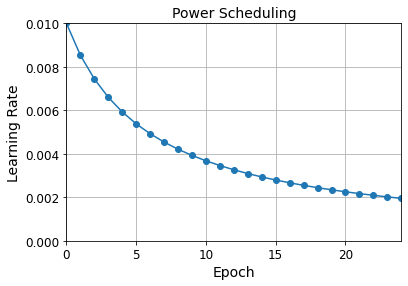

In [46]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

* 지수 기반 스케줄링

In [57]:
#지수 기반 스케줄링
#lr = lr0 * 0.1**(epoch / s)
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [58]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8208 - accuracy: 0.7639 - val_loss: 0.8072 - val_accuracy: 0.7304
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6560 - accuracy: 0.8038 - val_loss: 0.6641 - val_accuracy: 0.7916
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5761 - accuracy: 0.8230 - val_loss: 0.9716 - val_accuracy: 0.7594
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5231 - accuracy: 0.8380 - val_loss: 0.5031 - val_accuracy: 0.8346
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4640 - accuracy: 0.8529 - val_loss: 0.4906 - val_accuracy: 0.8564
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4291 - accuracy: 0.8651 - val_loss: 0.4730 - val_accuracy: 0.8554
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3995 - accuracy: 0.8721 - val_loss: 0.5286 - val_accuracy:

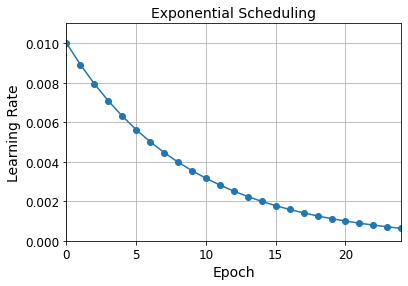

In [59]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [60]:
#이 스케줄 함수는 두 번째 매개변수로 현재 학습률을 받을 수 있다.
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [61]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # 노트: 에포크마다 `batch` 매개변수가 재설정됩니다
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # 20 에포크 동안 스텝 횟수 (배치 크기 = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8067 - accuracy: 0.7674 - val_loss: 0.7841 - val_accuracy: 0.7776
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6366 - accuracy: 0.8054 - val_loss: 0.5561 - val_accuracy: 0.8296
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5762 - accuracy: 0.8228 - val_loss: 0.5994 - val_accuracy: 0.8270
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5085 - accuracy: 0.8394 - val_loss: 0.4985 - val_accuracy: 0.8544
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4635 - accuracy: 0.8537 - val_loss: 0.5312 - val_accuracy: 0.8620
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4209 - accuracy: 0.8663 - val_loss: 0.5444 - val_accuracy: 0.8616
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3983 - accuracy: 0.8740 - val_loss: 0.4759 - val_accuracy:

In [62]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

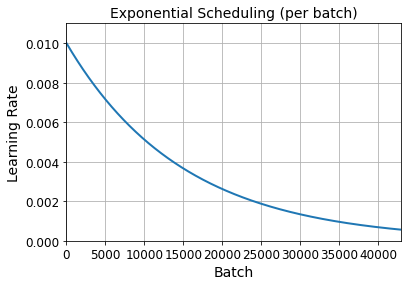

In [63]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

* 구간별 고정 스케줄링

In [64]:
#구간별 고정 스케줄링
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [65]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [66]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8783 - accuracy: 0.7431 - val_loss: 1.0357 - val_accuracy: 0.6726
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 1.0648 - accuracy: 0.6852 - val_loss: 0.8965 - val_accuracy: 0.7000
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9815 - accuracy: 0.6853 - val_loss: 1.2094 - val_accuracy: 0.5628
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9413 - accuracy: 0.6905 - val_loss: 0.9913 - val_accuracy: 0.6890
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9428 - accuracy: 0.6879 - val_loss: 0.8815 - val_accuracy: 0.6954
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6931 - accuracy: 0.7516 - val_loss: 0.6645 - val_accuracy: 0.7722
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6585 - accuracy: 0.7601 - val_loss: 0.7600 - val_accuracy:

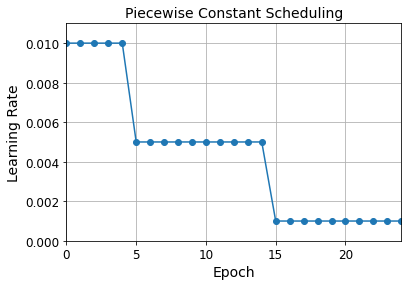

In [67]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

* 성능 기반 스케줄링

In [68]:
# 성능기반 스케줄링은 ReduceLROnPlateau을 사용한다
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5889 - accuracy: 0.8063 - val_loss: 0.5125 - val_accuracy: 0.8436
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4942 - accuracy: 0.8407 - val_loss: 0.5552 - val_accuracy: 0.8472
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5148 - accuracy: 0.8433 - val_loss: 0.4822 - val_accuracy: 0.8500
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5195 - accuracy: 0.8463 - val_loss: 0.5288 - val_accuracy: 0.8414
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5232 - accuracy: 0.8476 - val_loss: 0.5937 - val_accuracy: 0.8290
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5216 - accuracy: 0.8520 - val_loss: 0.5909 - val_accuracy: 0.8518
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5210 - accuracy: 0.8537 - val_loss: 0.5791 - val_accuracy:

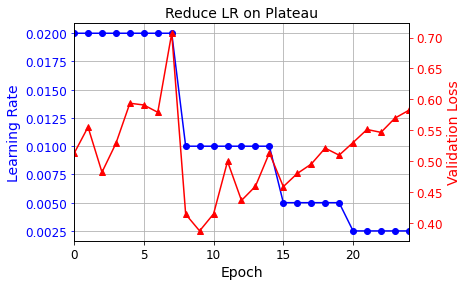

In [69]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

* 사이클 스케줄링

In [70]:
#1사이클 스케줄링
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [71]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.3884


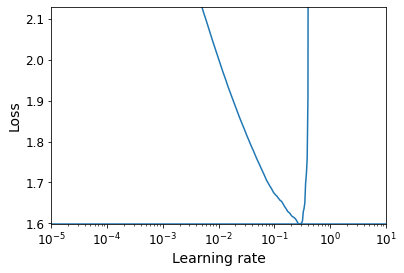

In [72]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [73]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [74]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 2ms/step - loss: 0.6572 - accuracy: 0.7739 - val_loss: 0.4872 - val_accuracy: 0.8340
Epoch 2/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4581 - accuracy: 0.8396 - val_loss: 0.4274 - val_accuracy: 0.8528
Epoch 3/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8545 - val_loss: 0.4114 - val_accuracy: 0.8582
Epoch 4/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8641 - val_loss: 0.3868 - val_accuracy: 0.8686
Epoch 5/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8717 - val_loss: 0.3765 - val_accuracy: 0.8686
Epoch 6/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8772 - val_loss: 0.3737 - val_accuracy: 0.8712
Epoch 7/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8809 - val_loss: 0.3633 - val_accuracy: 0.8716
Epoch 

In [75]:
#tf.keras 스케줄러
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4895 - accuracy: 0.8277 - val_loss: 0.4093 - val_accuracy: 0.8606
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3820 - accuracy: 0.8649 - val_loss: 0.3741 - val_accuracy: 0.8702
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.8765 - val_loss: 0.3735 - val_accuracy: 0.8680
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3265 - accuracy: 0.8835 - val_loss: 0.3494 - val_accuracy: 0.8812
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3105 - accuracy: 0.8898 - val_loss: 0.3430 - val_accuracy: 0.8790
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8951 - val_loss: 0.3411 - val_accuracy: 0.8802
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2856 - accuracy: 0.8986 - val_loss: 0.3355 - val_accuracy:

In [76]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

## 11.4 규제를 사용해 과대적합 피하기

### 11.4.1 $ℓ_{1} 과 ℓ_{2}$ 규제

In [77]:
#케라스 층의 연결 가중치에 규제 강도 0.01을 사용하여 ℓ_2 규제 적용
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 10s 5ms/step - loss: 1.5816 - accuracy: 0.8115 - val_loss: 0.7197 - val_accuracy: 0.8302
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7210 - accuracy: 0.8276 - val_loss: 0.6862 - val_accuracy: 0.8360


In [79]:
#반복문을 피하기 위해 코드를 리팩터링
#파이썬의 functions.partial() 함수를 사용하여 기본 매개변수 값을 함수 호출을 감싸기
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6630 - accuracy: 0.8123 - val_loss: 0.7201 - val_accuracy: 0.8308
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7188 - accuracy: 0.8266 - val_loss: 0.6806 - val_accuracy: 0.8402


### 11.4.2 드롭아웃

In [80]:
#드롭아웃 비율을 0.2를 사용한 드롭아웃 규제를 모든 Dense층 이전에 적용하는 코드
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5704 - accuracy: 0.8031 - val_loss: 0.3605 - val_accuracy: 0.8740
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4185 - accuracy: 0.8460 - val_loss: 0.3541 - val_accuracy: 0.8680


### 11.4.3 몬테 카를로 드롭아웃

In [81]:
#MC드롭아웃
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [82]:
#드롭아웃을 끈 패션MNIST
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.13, 0.  , 0.85]],
      dtype=float32)

In [83]:
#드롭아웃을 활성화
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.47, 0.  , 0.28]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.07, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.08, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.08, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.19, 0.  , 0.77]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.07, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.07, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.13, 0.  , 0.78]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.29, 0.  , 0.69]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.04, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.22, 0.  , 0.58]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.28, 0.  , 0